# <center> Mothur tutorial <br/> Analysis of results</center>
I wanted to show a higher level view of the results. I thought Python / Pandas will come in handy to produce plots and graphs that summarize the findings. Obviously this all can be done in R or Stata or anything you use on an everyday basis.

The original question I address with tis analysis is how our mouse sample and our Mock sample compares to one another in terms of OTUs. I will also check if the OTUs for the Mock sample matches our expectations.

## Preparation of the environment
First I make the imports of the necessary packages.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

I import the read count file and process it to make it handy for the analysis.

In [9]:
root_file = 'Data/tutor.trim.contigs.good.unique.filter.unique.precluster.pick'
shared = pd.read_csv(root_file + '.opti_mcc.unique_list.shared',
                     sep='\t',
                     index_col=1).transpose()
shared.head()

Group,F3D150,Mock
label,0.03,0.03
numOtus,199.00,199.00
Otu001,0.00,551.00
Otu002,437.00,2.00
Otu003,0.00,373.00


I import the taxonomy information for each OTU, and I expand the `Taxonomy` column to have detailed taxonomy info.

In [286]:
taxonomy = pd.read_csv(root_file + '.opti_mcc.unique_list.0.03.cons.taxonomy',
                     sep='\t',
                     index_col=0)

ranks = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']
for i in range(0, len(ranks)):
    taxonomy[ranks[i]] = taxonomy['Taxonomy'].apply(lambda x: re.sub('\([0-9]+\)$', '', x.split(';')[i]))
taxonomy.head()

,Size,Taxonomy,kingdom,phylum,class,order,family,genus
OTU,,,,,,,,
Otu001,551,Bacteria(100);Firmicutes(100);Bacilli(100);Bac...,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus
Otu002,439,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Barnesiella
Otu003,373,Bacteria(100);Proteobacteria(100);Gammaproteob...,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter
Otu004,347,Bacteria(100);Firmicutes(100);Bacilli(100);Bac...,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillales_unclassified,Bacillales_unclassified
Otu005,343,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Porphyromonadaceae_unclassified


## Overview of OTUs

I define a helper function to produce some filtering and some pretty graphics for plotting summaries of different taxonomy levels. It can filter for unwanted strings, such as `_unclassified`, and merges all the categories smaller than 1% into the category, `Other` and produce a pretty pie plot.

In [275]:
def pretty_pie_bact(subject, unwanted=None):
    if unwanted is not None:
        subject_wanted = subject.iloc[[all([re.search(y, x) is None for y in unwanted]) for x in subject.index], :]
    else:
        subject_wanted = subject
        
    subject_wanted_less = subject_wanted[(subject_wanted / subject_wanted.sum()) < 0.01]
    subject_wanted = subject_wanted[(subject_wanted / subject_wanted.sum()) >= 0.01]
    subject_wanted.append(pd.DataFrame(['Other', float(subject_wanted_less.sum()), ], 
                                       index=['0', 'Size']).transpose().set_index('0'))

    pie_explode = [0] * subject_wanted.shape[0]
    pie_explode[0:3] = [0.1] * 3;
    ax = subject_wanted.plot.pie(y='Size', autopct='%1d%%', shadow=True, explode=pie_explode, startangle=45)
    ax.legend([])
    ax.set_ylabel('')
    plt.show()

The contribution of the different Phylae to the overall variety of reads in the two samples, *combined*.

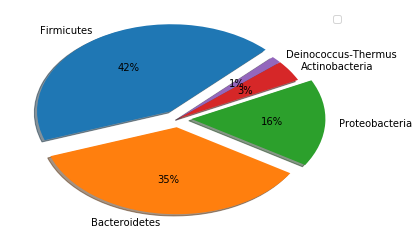

In [271]:
pretty_pie_bact(taxonomy.groupby(['phylum']).sum().sort_values('Size', ascending=False),
                ['_unclassified', 'Saccharibacteria'])

The same at the a lower level, notice that the phylae start to break up into classes. For example Firmicutes is now in two element in the pie chart.

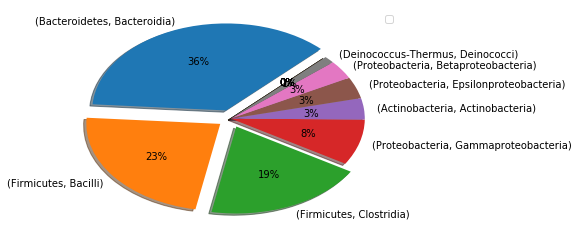

In [278]:
pretty_pie_bact(taxonomy.groupby(['phylum', 'class']).sum().sort_values('Size', ascending=False))

Finally let's have a look at the order leve. We can see that the most homogeneous phylum is the `Bacteroidetes` which did not fragement even at this level.

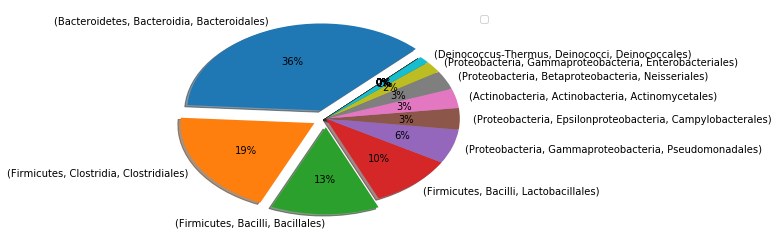

In [277]:
pretty_pie_bact(taxonomy.groupby(['phylum', 'class', 'order']).sum().sort_values('Size', ascending=False))

## OTUs broken down by sample
We can see that there are not very many higher level OTUs. Let's see how these distribute between the samples. By the end of this we should see how different the F3D150 and the Mock sample are.

First I strip the summaries (first two rows) off of the count data.

In [14]:
F3D150 = shared['F3D150'][2::]
F3D150 = F3D150[F3D150>0]
Mock = shared['Mock'][2::]
Mock = Mock[Mock>0]

Next, I join the taxonomy information onto the count data for both samples.

In [15]:
F3D150_taxonomy = taxonomy.iloc[:, 1:].join(F3D150, how='inner')
F3D150_taxonomy.rename(columns={'F3D150': 'Size'}, inplace=True)
Mock_taxonomy = taxonomy.iloc[:, 1:].join(Mock, how='inner')
Mock_taxonomy.rename(columns={'Mock': 'Size'}, inplace=True)
F3D150_taxonomy.head()

,Taxonomy,kingdom,phylum,class,order,family,genus,Size
Otu002,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Barnesiella,437.0
Otu005,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Porphyromonadaceae_unclassified,343.0
Otu008,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Porphyromonadaceae_unclassified,281.0
Otu010,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Porphyromonadaceae_unclassified,274.0
Otu012,Bacteria(100);Bacteroidetes(100);Bacteroidia(1...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Porphyromonadaceae_unclassified,264.0


Below I group OTUs at the class level to have a higher level view. Then, I list the number of reads in each OTU per sample.

In [123]:
grouping = ['phylum', 'class'];
F3D150_orders = F3D150_taxonomy.groupby(grouping).sum().sort_index()
Mock_orders = Mock_taxonomy.groupby(grouping).sum().sort_index()
F3D150_orders

Size
phylum                      class                                           
Actinobacteria              Actinobacteria                              28.0
Bacteria_unclassified       Bacteria_unclassified                       29.0
Bacteroidetes               Bacteroidetes_unclassified                   1.0
                            Bacteroidia                               2574.0
Candidatus_Saccharibacteria Candidatus_Saccharibacteria_unclassified     2.0
Firmicutes                  Bacilli                                    131.0
                            Clostridia                                1263.0
                            Erysipelotrichia                            30.0
                            Firmicutes_unclassified                     70.0
Proteobacteria              Gammaproteobacteria                          2.0

In [124]:
Mock_orders

Size
phylum                class                        
Actinobacteria        Actinobacteria          290.0
Bacteria_unclassified Bacteria_unclassified     2.0
Bacteroidetes         Bacteroidia             338.0
Deinococcus-Thermus   Deinococci              103.0
Firmicutes            Bacilli                1723.0
                      Clostridia              281.0
Proteobacteria        Alphaproteobacteria      46.0
                      Betaproteobacteria      276.0
                      Epsilonproteobacteria   318.0
                      Gammaproteobacteria     679.0

Next I visualize the results to make comparison slightly easier.

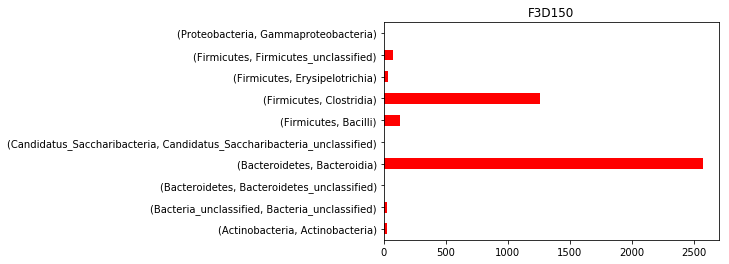

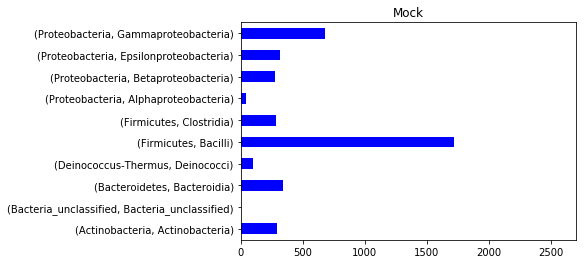

In [125]:
ax = F3D150_orders.plot.barh(y='Size', color='red', title='F3D150', legend=[])
ax.set_ylabel('')
ax.set_xlim([0, 2700])
ax = Mock_orders.plot.barh(y='Size', color='blue', title='Mock', legend=[])
ax.set_ylabel('')
ax.set_xlim([0, 2700])
plt.show()

It is clear that the two samples are different qualitatively and quantitatively. Note that the `Bacteroidetes` phylum produced the most reads for `F3D150` while `Firmicutes` was the most pronunced in the `Mock` sample. The overall contig number in the two samples was nearly the same, as shown below.

In [23]:
print F3D150_orders.sum()
print Mock_orders.sum()

Size    4130.0
dtype: float64
Size    4056.0
dtype: float64


## Validation of the data analysis using the composition of the `Mock` sample
Here I assess if the Mock sample has the same composition as reported in the reference fasta file: `HMP_MOCK.v35.fasta.gz`. To do this, I first need to extract the species names and obtain the taxonomy data. I will use the EBI database API to pull the necessary information.

First, I extract the unique names from the FASTA file.

In [4]:
gunzip -c Data/HMP_MOCK.v35.fasta.gz | grep '^>' | tr -d '>' | cut -f1,2 -d '.' | uniq | sed 's/\./. /'

A. baumannii
A. odontolyticus
B. cereus
B. vulgatus
C. beijerinckii
D. radiodurans
E. faecalis
E. coli
H. pylori
L. gasseri
L. monocytogenes
N. meningitidis
P. acnes
P. aeruginosa
P. gingivalis
R. sphaeroides
S. aureus
S. epidermidis
S. agalactiae
S. mutans
S. pneumoniae


Unfortunately the EBI lookup does not support the partial names well, therefore I manually had to resolve the full names for taxonomy lookup. Note that *P. acnes* is missing, the EBI database lookup was unsuccessful, so I removed it.

In [1]:
Mock_sample_known_raw = \
'''Acinetobacter baumannii
Actinomyces odontolyticus
Bacillus cereus
Bacteroides vulgatus
Clostridium beijerinckii
Deinococcus radiodurans
Enterococcus faecalis
Escherichia coli
Helicobacter pylori
Lactobacillus gasseri
Listeria monocytogenes
Neisseria meningitidis
Pseudomonas aeruginosa
Porphyromonas gingivalis
Rhodobacter sphaeroides
Staphylococcus aureus
Staphylococcus epidermidis
Streptococcus agalactiae
Streptococcus mutans
Streptococcus pneumoniae'''.split('\n')

The function below will fetch taxonomical data from EBI server and it also processes this information. Only one lookup is possible at a time.

In [151]:
import requests
# Helper function to obtain lineage
def get_lineage(sci_name):
    retry = True
    while retry:
        try:
            req = requests.get(url='http://www.ebi.ac.uk/ena/data/taxonomy/v1/taxon/scientific-name/{}'.format(sci_name.replace(' ', '%20')),
                               timeout=2)
            retry = False
        except requests.exceptions.Timeout:
            retry = True
            
    keys = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
    values = (req.json()[0].get('lineage').replace(';','') + req.json()[0].get('scientificName')).split(' ')
    return(dict(zip(keys, values)))

I obtain the lineages for all bacterial species below.

In [152]:
lineages_raw = []
# Looping through all taxa and fetching all lineage data
for species in Mock_sample_known_raw:
    lineages_raw.append(get_lineage(species))

I process the lineages to be in a similar DataFrame as the sample data are.

In [155]:
lineages = pd.DataFrame(lineages_raw, index=range(0, len(Mock_sample_known_raw)))
lineages

,class,family,genus,kingdom,order,phylum,species
0,Gammaproteobacteria,Moraxellaceae,Acinetobacter,Bacteria,Pseudomonadales,Proteobacteria,Acinetobacter
1,Actinomycetales,Actinomyces,Actinomyces,Bacteria,Actinomycetaceae,Actinobacteria,odontolyticus
2,Bacilli,Bacillaceae,Bacillus,Bacteria,Bacillales,Firmicutes,Bacillus
3,Bacteroidia,Bacteroidaceae,Bacteroides,Bacteria,Bacteroidales,Bacteroidetes,Bacteroides
4,Clostridia,Clostridiaceae,Clostridium,Bacteria,Clostridiales,Firmicutes,Clostridium
5,Deinococci,Deinococcaceae,Deinococcus,Bacteria,Deinococcales,Deinococcus-Thermus,Deinococcus
6,Bacilli,Enterococcaceae,Enterococcus,Bacteria,Lactobacillales,Firmicutes,Enterococcus
7,Gammaproteobacteria,Enterobacteriaceae,Escherichia,Bacteria,Enterobacterales,Proteobacteria,Escherichia
8,Epsilonproteobacteria,Helicobacteraceae,Helicobacter,Bacteria,Campylobacterales,Proteobacteria,Helicobacter
9,Bacilli,Lactobacillaceae,Lactobacillus,Bacteria,Lactobacillales,Firmicutes,Lactobacillus


I obtain a normalized represenation of the individual OTUs on the class level, assuming that each species was represnted by the same number of bacteria in the Mock sample.

In [281]:
lineages['Size']=[1] * lineages.shape[0]
lineages_order = lineages.groupby(['phylum', 'class']).sum()
lineages_groupped=lineages_order['Size']/sum(lineages_order['Size'])*100
lineages_groupped

phylum               class                
Actinobacteria       Actinomycetales           5.0
Bacteroidetes        Bacteroidia              10.0
Deinococcus-Thermus  Deinococci                5.0
Firmicutes           Bacilli                  45.0
                     Clostridia                5.0
Proteobacteria       Alphaproteobacteria       5.0
                     Betaproteobacteria        5.0
                     Epsilonproteobacteria     5.0
                     Gammaproteobacteria      15.0
Name: Size, dtype: float64

I generate a normalized OTU list on the class level based on the contig numbers in the Mock sample.

In [282]:
Mock_orders_groupped = (Mock_orders['Size']/sum(Mock_orders['Size'])*100).round()
Mock_orders_groupped

phylum                 class                
Actinobacteria         Actinobacteria            7.0
Bacteria_unclassified  Bacteria_unclassified     0.0
Bacteroidetes          Bacteroidia               8.0
Deinococcus-Thermus    Deinococci                3.0
Firmicutes             Bacilli                  42.0
                       Clostridia                7.0
Proteobacteria         Alphaproteobacteria       1.0
                       Betaproteobacteria        7.0
                       Epsilonproteobacteria     8.0
                       Gammaproteobacteria      17.0
Name: Size, dtype: float64

To get a better feel for the differences or similarities I post a barplot where the two datasets are plotted on the same axis, i.e. the bar positions are the same. Matching height indicates agreement.

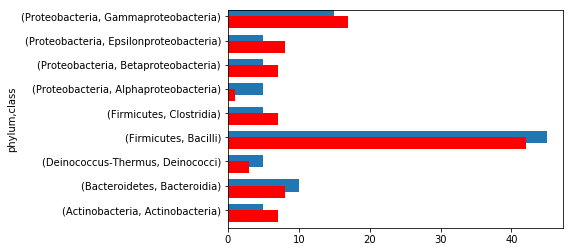

In [285]:
ax = lineages_groupped.plot.barh()
Mock_orders_groupped[Mock_orders_groupped>0].plot.barh(position=1, color='red')
plt.show()

At the Class level the agreement is fairly good, almost quantitative!